# <font color=navy> Lecture 7. 다중회귀분석(Multiple Linear Regression) </font>


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
data_path = "../data/"
ad = pd.read_csv(data_path + "Advertising.csv")

### Example: Advertising 
- TV광고 외에 라디오와 신문광고에 대한 지출도 활용하여 sales를 설명하고 싶음 
- 설명변수 각각을 사용하여 3개의 단순회귀분석 사용??  (No!)
    - 서로 다른 광고매체의 예산은 다른 회귀방정식과 연관 
$$ y_i= \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \cdots + \beta_p x_{pi} +\epsilon_i $$

## 7.1 회귀계수의 추정 
- 추정된 회귀식
$$ \hat y_i = \hat  \beta_0 + \hat\beta_1 x_{1i} + \hat\beta_2 x_{2i} + \cdots +\hat \beta_p x_{pi} $$

- RSS를 최소화 하는 최소제곱법 사용 
$$ RSS=\sum (y_i - \hat y)^2 = \sum (y_i - \hat \beta_0 - \hat \beta_1 x_{i1} - \cdots - \hat \beta_p x_{ip})^2 $$

<img src='http://drive.google.com/uc?export=view&id=1aXBr2nn7CYgchvqbIr_MsvDV5jiGCvE-' width = 400/><br>

In [30]:
model2 = smf.ols('Sales ~ Radio + Newspaper + TV', data = ad).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        17:39:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
TV             0.0458      0.001     32.809      0.000       0.043       0.049
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7.2 모델의 유의성 평가: F 검정 
- $Y$와 $X$들 사이에 상관관계가 있는가? 
$$ H_0: \beta_1=\beta_2 =\cdots =\beta_p=0$$
$$ H_1: \mbox{적어도 하나의 }\beta_j \mbox{는 0이 아니다.}$$

- F  통계량 
    $$F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)} \sim F_{p, n-p-1}$$
    - $H_0$가 사실이면 $F=1$ 
    - F=570에 대한 p-value가 0에 가까움: 광고매채 중 적어도 하나는 판매량 증가와 상관관계가 있다는 아주 강한 증거 

<!-- ## 다중 회귀분석: 부분 F검정  -->

<!-- - q개의 특정 계수가 0인지 검정하고 싶다면?  -->
<!-- \[H_0: \beta_{p-q+1}=\beta_{p-q+2} = \cdots= \beta_p=0\] -->

<!--     - F 통계량 -->
<!--         \[F=\frac{(RSS_0 - RSS)/q}{RSS/(n-p-1)} \]  -->

<!--     - $RSS_0$: 해당하는 q개의  계수를 제외한 모든 변수를 사용하는 모형에 대한 잔차제곱합  -->

<!--     - "각 회귀계수에 대한 t-검정" = "$q=1$인 경우의 F 검정"  -->

<!--     - 그 변수들을 추가하는 것에 대한 \structure{부분적 효과}에 대한 검정  -->

## 7.3  회귀계수의 검정: T 검정
- 다른 설명변수의 효과를 조정했을 때 $X_i$가 Y와 상관관계가 있는가?
$$ H_0: \beta_i=0$$
$$ H_1: \beta_i \neq 0$$ 

- t  통계량 
$$ \frac{\hat \beta_i }{SE(\hat \beta_i)} \sim t_{n-p-1}$$
- TV와 radio의 p-value<0.05: sales를 설명하는데 유의하다.
- Newspaper의 p-value>0.05: sales를 설명하는데 유의하지 않다.
    - **TV와 라디오 광고가 모형에 포함되어 있을 경우** 신문 광고는 sales와 상관성이 있다는 증거가 없다고 결론
    - 왜? 라디오 광고에 지출을 많이 하는 마켓일 수록 신문 광고에도 더 많이 지출하는 경향이 있음
    - 그렇다면 Newspaper와 Sale의 단순 회귀모형의 결과는 어떨까?


    

In [31]:
model3 = smf.ols('Sales ~ Newspaper', data = ad).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 05 Nov 2020   Prob (F-statistic):            0.00115
Time:                        17:39:13   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Newspaper와 sales의 단순회귀모형에서는 회귀계수가 유의하다는 결과가 나온다.
- 신문광고에 의한 판매량이라고 보이는 것이 실제로는 라디오 광고에 의한 것




#### 회귀계수의 해석 
- $\beta_i$는 _**모든 다른 독립변수가 일정할 때**_ $x_i$의 1단위 변화에 대한 $y$값 변화의 추정치

- 다른 매체에 대한 광고지출액이 일정할 때 TV광고에 1000달러 지출을 증가시키면 판매량은  45.8 unit 증가할 것이다.

- 다른 매체에 대한 광고지출액이 일정할 때 Radio광고에 1000달러 지출을 증가시키면 판매량은 188.5 unit  증가할 것이다.

## 7.4 예측
- 추정된 회귀식에 의해 예측 
$$\hat Y= \hat \beta_0 + \hat \beta_1 X_1 + \cdots + \hat \beta_p X_p $$


   

In [5]:
model4 = smf.ols('Sales ~ Radio + TV', data = ad).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           4.83e-98
Time:                        16:13:37   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
TV             0.0458      0.001     32.909      0.000       0.043       0.048
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
pred = model4.get_prediction(exog = dict(TV=100, Radio=20))
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.256466,0.137526,10.985254,11.527677,7.929616,14.583316


- 신뢰구간 
    - 수많은 도시에 대한 평균 판매량을 둘러싼 불확실성을 수량화
    - TV광고에 10만달러, Radio광고에 2만달러를 지출한다면 판매량의 평균은 10985개와 11528개 사이일 것으로 95% 확신함

- 예측구간
    - 특정 도시의 판매량에 대한 불확실성을 수량화
    - TV광고에 10만달러, Radio광고에 2만달러를 지출한 도시에서 판매량은 7930개와 14583개 사이일 것으로 95% 확신함  
  

 


## 7.5 회귀모형의 잠재적 문제: 회귀진단 
### 7.5.1   데이터의 비선형성 
- 잔차그래프의 확인 
    - $e_i=y_i - \hat y_i$ vs. $x_i$ 의 그래프를 확인
    - 모델이 이상적이라면 인지할만한 패턴이 존재하지 않는다.
    - 잔차 그래프가 비선형 상관성이 있다면 $\log X, \sqrt X, X^2$과 같이 설명변수들을 비선형적으로 변환하여 회귀모델에 적용하는 것이 간단한 접근법 
        

In [7]:
auto = pd.read_csv(data_path +"Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [106]:
model_auto = smf.ols('mpg~horsepower', data = auto).fit()
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           7.03e-81
Time:                        13:25:11   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

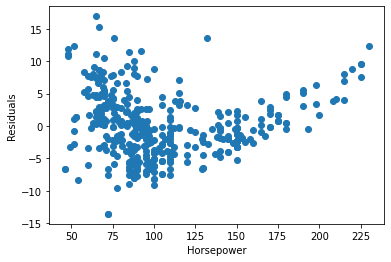

In [37]:

plt.scatter(auto.horsepower,model_auto.resid)
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.show()

In [108]:
model_auto2 = smf.ols('mpg~horsepower+np.square(horsepower)', data = auto).fit()
model_auto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           5.40e-99
Time:                        13:25:19   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                56.9001      1.800     31.604      0.000      53.360      60.440
horsepower               -0.4662      0.031    -14.978      0.000      -0.527      -0.405
np.square(horsepower)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

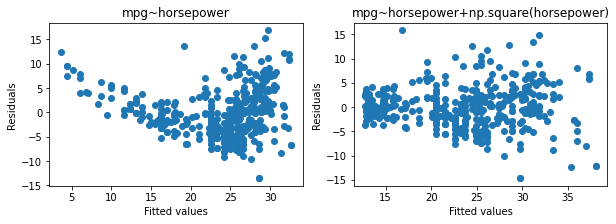

In [38]:
plt.figure(figsize=(10, 3))

plt.title('mpg~horsepower')
plt.subplot(1,2,1)
plt.scatter(model_auto.fittedvalues, model_auto.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower')

plt.subplot(1,2,2)
plt.scatter(model_auto2.fittedvalues, model_auto2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower+np.square(horsepower)')
plt.show()

### 7.5.2 오차항의 상관성 
- 선형모델의 가정: 오차항 $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$이 서로 상관되어 있지 않다는 것 
- 오차항 사이에 상관성이 있으면 추정된 표준오차는 실제 표준오차를 과소추정하는 경향이 발생한다.
    - 계산된 95% 신뢰구간과 예측구간이 실제 모수를 포함할 가능성이 95%보다 낮을 수 있다. 
    - 모수가 통계적으로 유의하다 잘못된 결론을 내릴 수 있다.

- 시계열 데이터에서 자주 발생 
    - 잔차를 시간의 함수로 그렸을 때 인지할 만한 패턴이 없어야 한다. 

<img src='http://drive.google.com/uc?export=view&id=1ZjwmNStYGnMiw9WEuzFBuBPTwC_ZJ0MH' width=500/><br> 

#### Durbin-Watson 통계량 
$$ D = \frac{\sum_t (e_t-e_{t-1})^2}{\sum_t e_t^2} \approx 2(1-r)$$ 
- $r$: sample autocorrelation
- $0<D<4$
- $D \approx 2$ : no autocorrelation
- $D \approx 0$ : positive serial correlation
- $D \approx 4$ : negative serial correlation

In [40]:
x_t = np.random.normal(0, 1, 200) # 독립표본
x_t[0] = 0
y_t = np.zeros(200)
for i in range(1, 200):
    y_t[i] = np.random.normal(y_t[i - 1], 1) # 자기상관이 있는 표본

from statsmodels.stats.stattools import durbin_watson
print('Durbin-Watson statistics for x_t:', durbin_watson(x_t))
print('Durbin-Watson statistics for y_t:', durbin_watson(y_t))

Durbin-Watson statistics for x_t: 1.9983658072248243
Durbin-Watson statistics for y_t: 0.028212402721232228


In [110]:
durbin_watson(model_auto2.resid)

1.078213938713291

### 7.5.3 오차항의 이분산성(heteroscedasticity)
- 선형모델의 가정: $Var(\epsilon_i)= \sigma^2$
- 잔차그래프에 깔때기 형태가 있는지 보고 식별 

#### 종속변수의 변환
- 예를 들면, $log(y)$한 뒤 회귀식을 적합

<img src='http://drive.google.com/uc?export=view&id=1qWMJojwzeKfbWmlayeeJogaIk46es9QD' width=500 /><br>    

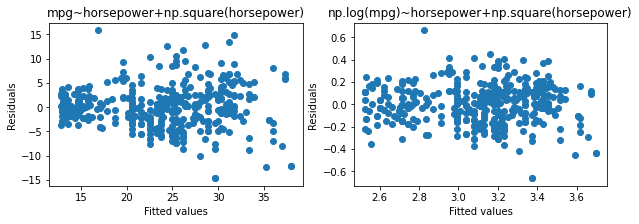

In [9]:
model_auto3 = smf.ols('np.log(mpg)~horsepower+np.square(horsepower)', data = auto).fit()
# print(model_auto3.summary())

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.scatter(model_auto2.fittedvalues, model_auto2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('mpg~horsepower+np.square(horsepower)')
plt.subplot(1,2,2)
plt.scatter(model_auto3.fittedvalues, model_auto3.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('np.log(mpg)~horsepower+np.square(horsepower)')
plt.show()

#### 가중최소제곱(weighted least squares; WLS) 방법

$$ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i, ~~Var(\epsilon_i) = \sigma
_i^2, i=1,2,\cdots, n$$

- $1/\sigma_i^2$을 가중치로 하는 WLS 모형을 적합한다. 
- $\sigma_i^2$을 어떻게 계산하는가? 
    - 이론에 의해 알고 있는 경우 
    - 특정 변수에 따라 잔차의 분산이 커지는 경우 해당 변수의 역수(혹은 역수의 제곱)을 weight로 사용 
    - 잔차의 절대값을 종속변수로, fitted value를 설명변수로 하는 선형모형을 적합하여 그 모형의 적합값을 활용하여 weight로 설정


### 7.5.4 이상치(outlier)
- 모델이 예측한 값과 $y_i$가 크게 다른 점

<img src='http://drive.google.com/uc?export=view&id=1QpVG726vEZi2VhugMzaIe2Zpg5CGmphZ' /><br>

- 이 경우 이상치를 제거하는 것이 최소제곱선에 거의 영향을 주지 않음 

- 얼마나 커야 이상치라고 결정?
    - **스튜던트화 잔차(studentized residual)**: 잔차/추정표준오차 
    - $|\mbox{스튜던트화 잔차} |>3$이면 이상치라고 판정
    

In [10]:
inf3 = OLSInfluence(model_auto3)
# inf3.summary_frame()

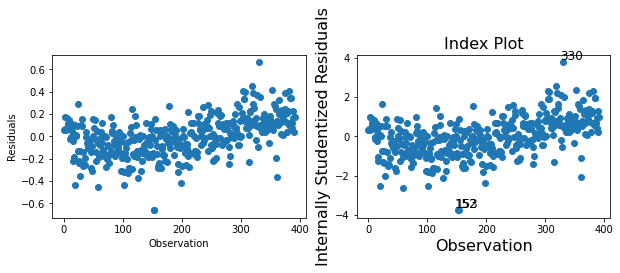

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10, 3))
ax[0].scatter(auto.index,model_auto3.resid)
ax[0].set_xlabel('Observation')
ax[0].set_ylabel('Residuals')
inf3.plot_index('resid',threshold=3, ax = ax[1])
plt.show()

- 이상치 처리?
    - 이상치가 수집 또는 기록에 의한 오류에 의해 발생하였다면 관측치를 제외
    - 필요 설명변수가 없는 것과 같은 모델의 결함을 나타낼 수 있으므로 주의 

### 7.5.5 영향점 (Influential points) 
- 이상치: 주어진 $x_i$값에 대해 $y_i$ 값이 보통 수준과 다른 관측치
- 영향점: 추정회귀선에 영향을 많이 주는 관측치 

<img src='http://drive.google.com/uc?export=view&id=1MRJWP9beO9Leh6OAWaQj22LiF8ezJGYC' /><br>


#### 레버리지(leverage) 통계량
- 단순회귀분석의 경우 
$$ h_i = \frac 1 n + \frac {(x_i - \bar x)^2 }{\sum_{i'} (x_{i'} - \bar x )^2 }$$
-  $x_i$값이 $\bar x$에서 멀리 떨어져 있을 수록 레버리지 값이 크다.
- $h_i$의 평균은 $(p+1)/n$
- 레버리지와 residual이 동시에 크면 추정회귀선에 큰 영향을 준다. 

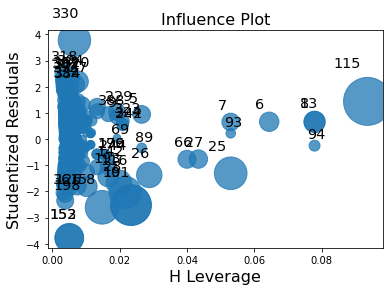

In [12]:
inf3.plot_influence()
plt.show()

#### Cook's distance 

$$ D_i = \frac{(y_i - \hat y_i )^2}{p\cdot MSE} \frac{h_i}{(1-h_{ii})^2}$$

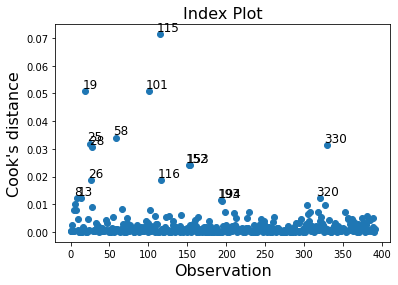

In [179]:
inf3.plot_index('cook',threshold=4/(model_auto3.nobs-2-1))
plt.show()

### 7.5.6 다중공선성(multicollinearity)
- 두 개 또는 그 이상의 설명변수들이 서로 밀접하게 상관되어 있는 경우 
- Credit 데이터

In [24]:
credit = pd.read_csv(data_path+"Credit.csv", index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


<img src='http://drive.google.com/uc?export=view&id=1f4dN4KMJud7AmJ7P-dKH71A_TSD_yaE2' /><br>

- 공선성의 존재가 일으키는 문제
    - 각 변수들의 개별효과를 분리하기 어려움
    - 계수 추정치의 불확실성 증가: $\hat \beta_j$의 표준오차 증가, 가설검정 능력의 저하 

<img src='http://drive.google.com/uc?export=view&id=1YVjwE-A_2wU6FAZbW2YwTt5swtpsZ_b7' /><br>
   

In [66]:
model_credit = smf.ols('Balance~Age+Limit', data = credit).fit()
model_credit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.0
Date:                Tue, 03 Nov 2020   Prob (F-statistic):          3.52e-120
Time:                        23:33:02   Log-Likelihood:                -2742.2
No. Observations:                 400   AIC:                             5490.
Df Residuals:                     397   BIC:                             5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
==============================================================================
Omnibus:                       19.180   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.162
Skew:                           0.382   Prob(JB):                     1.26e-06
Kurtosis:                       4.022   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
model_credit2 = smf.ols('Balance~Rating+Limit', data = credit).fit()
model_credit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     582.8
Date:                Tue, 03 Nov 2020   Prob (F-statistic):          7.57e-119
Time:                        23:34:12   Log-Likelihood:                -2745.3
No. Observations:                 400   AIC:                             5497.
Df Residuals:                     397   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150
==============================================================================
Omnibus:                       23.153   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.187
Skew:                           0.394   Prob(JB):                     5.10e-09
Kurtosis:                       4.293   Cond. No.                     2.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 공선성 검출 방법
    - 설명변수들의 상관계수 행렬 관찰 
        - 상관계수의 절대값이 크면 공선성 발생 가능
        - 모든 공선성 문제가 상관계수 행렬에 의해 발견 가능하지 않음
        - 다중공선성(multicollinearity): 세 개 또는 그 이상의 변수들 사이에 공선성 존재 가능
    - 분산팽창인수(VIF; variance inflation factor) 계산 
        $$ VIF(\hat \beta_j) = \frac {1}{1-R^2_{X_j | X_{-j}}}$$
        - $R^2_{X_j | X_{-j}}$: $X_j$를 다른 모든 설명변수들에 적합한 회귀모델의 $R^2$
        - 가능한 가장 작은 값=1: 공선성이 전혀 없음
        - VIF가 5 또는 10을 초과하면 공선성 존재한다고 경험적으로 판단 
        
      

In [26]:
model_credit3 = smf.ols('Balance~Age+Rating+Limit', data = credit).fit()
import patsy
y, X = patsy.dmatrices('Balance~Age+Rating+Limit', credit, return_type='matrix')

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 23.80295451367821
VIF of Age : 1.0113846860681328
VIF of Rating : 160.66830095856935
VIF of Limit : 160.59287978597942




- 공선성의 해결
    - 문제가 있는 변수들 중의 하나를 제거 
        - 회귀적합에 별로 나쁜 영향을 주지 않음 
    - 변수선택 방법 사용 
    - 공선성 변수들을 단일 설명변수로 결합 
        - 새로운 변수 생성
        - 주성분분석 활용 
        